# Metadata survey

This notebook reports the number of volume-slices we have bearing specified tags, or in specified periods.

In [15]:
# First, some standard imports.

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
# Read in master metadata, and create a column of sets
# that can be used for genre checking.

md = pd.read_csv('mastermetadata.csv')

def tags2tagset(x):
    ''' function that will be applied to transform
    fantasy|science-fiction into {'fantasy', 'science-fiction'} '''
    if type(x) == float:
        return set()
    else:
        return set(x.split('|'))

column_of_sets = md['tags'].apply(tags2tagset)
md = md.assign(tagset = column_of_sets)

## Let's get that data!

In [17]:
thresholds = [1800, 1850, 1898, 1920, 1950, 1970, 1980, 1990, 2000, 2010]

dfrows = []

for i in range(1, len(thresholds)):
    
    floor = thresholds[i-1]
    ceiling = thresholds[i]
    period = md[(md.firstpub >= floor) & (md.firstpub < ceiling)]
    # we get rows between a pair of thresholds
    # as often in Python, only the bottom limit is inclusive
    
    fantasy = 0
    scifi = 0
    both = 0
    ran = 0
    juv = 0
    
    for idx, row in period.iterrows():
        t = row['tagset']
        genrecount = 0
        if ('fantasy_loc' in t) | ('fantasy_oclc' in t) & ('juv' not in t):
            fantasy += 1
            genrecount += 1
        if ('sf_loc' in t) | ('sf_oclc' in t) & ('juv' not in t):
            scifi += 1
            genrecount += 1
        if 'random' in t:
            ran += 1
        if 'juv' in t:
            juv += 1
        
        if genrecount == 2:
            both += 1
    
    dfrow = dict()
    dfrow['floor'] = floor
    dfrow['ceiling'] = ceiling
    dfrow['scifi'] = scifi
    dfrow['fantasy'] = fantasy
    dfrow['random'] = ran
    dfrow['juv%'] = (juv * 100) / (scifi + ran + fantasy)
    dfrow['overlap%'] = (both * 100) / (scifi + fantasy)
    
    dfrows.append(dfrow)
    
df = pd.DataFrame(dfrows)

df.head()

,ceiling,fantasy,floor,juv%,overlap%,random,scifi
0,1850,8,1800,1.724138,0.000000,44,6
1,1898,70,1850,9.427609,6.060606,132,95
2,1920,78,1898,10.676157,3.825137,98,105
3,1950,86,1920,3.693182,6.542056,138,128
4,1970,112,1950,2.579365,4.823151,193,199


In [18]:
df


,ceiling,fantasy,floor,juv%,overlap%,random,scifi
0,1850,8,1800,1.724138,0.000000,44,6
1,1898,70,1850,9.427609,6.060606,132,95
2,1920,78,1898,10.676157,3.825137,98,105
3,1950,86,1920,3.693182,6.542056,138,128
4,1970,112,1950,2.579365,4.823151,193,199
5,1980,80,1970,0.714286,2.793296,101,99
6,1990,97,1980,0.692042,2.061856,95,97
7,2000,97,1990,0.000000,3.191489,99,91
8,2010,86,2000,0.719424,5.913978,92,100


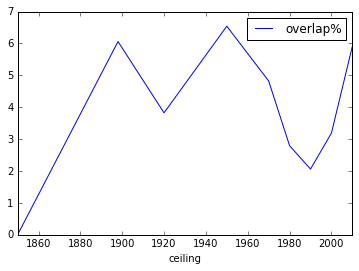

In [19]:
df.plot('ceiling', 'overlap%')
plt.show()